Import Packages

In [1]:
# for numerical analysis
import numpy as np # linear algebra

# to store and process in a dataframe
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizations, for ploting graphs
import matplotlib.pyplot as plt

# image processing
import matplotlib.image as mpimg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# advanced ploting
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Image manipulations
from PIL import Image
#from libjpeg import decode

# Timing utility
from timeit import default_timer as timer

from IPython.core.interactiveshell import InteractiveShell

# Printing out all outputs
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# PyTorch
import torchvision
from torchvision import transforms, datasets, models

import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d
from torch.nn import Module, Softmax, BatchNorm2d, Dropout

import gc

C:\Users\Brian Ashiali\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [4]:
# file operations

import shutil
import os
from os import walk

# to list files
import glob

print(os.listdir("ECG_data/"))

['test', 'train']


In [5]:
# current working directory
os.getcwd()

'C:\\Users\\Brian Ashiali\\Desktop\\Ml_class\\class_1\\FiN_project_Ml\\trial_2_final'

In [6]:
# no. of files

def list_files(startpath):
    
    for root, dirs, files in os.walk(startpath):
        
        level = root.replace(startpath, '').count(os.sep)
        
        indent = ' ' * 4 * (level)
        
        print('{}{}'.format(indent, os.path.basename(root)), '-', len(os.listdir(root)))
        
folder = 'ECG_data/'
list_files(folder)

 - 2
test - 6
    F - 161
    M - 2101
    N - 18926
    Q - 1608
    S - 556
    V - 1447
train - 6
    F - 642
    M - 8405
    N - 75709
    Q - 6431
    S - 2223
    V - 5789


In [7]:
folder = 'ECG_data/'
list_files(folder)

 - 2
test - 6
    F - 161
    M - 2101
    N - 18926
    Q - 1608
    S - 556
    V - 1447
train - 6
    F - 642
    M - 8405
    N - 75709
    Q - 6431
    S - 2223
    V - 5789


In [9]:
# list of files in the dataset /input/ecg-images/MITBIH_img

os.listdir('ECG_data/test/')

['F', 'M', 'N', 'Q', 'S', 'V']

In [10]:
# Classes in the data

ECG_list = os.listdir('ECG_data/test/')

n_classes = len(ECG_list)

print(f'There are {n_classes} different classes.')

There are 6 different classes.


In [11]:
ECG_list

['F', 'M', 'N', 'Q', 'S', 'V']

In [13]:
classes = ('S', 'V', 'Q', 'N', 'F', 'M')

Count Number of Files in the MITBIH_img Folder

In [14]:
N_imgs = os.listdir('ECG_data/test/N/')
print('# of Normal beats: ',len(N_imgs))

F_imgs = os.listdir('ECG_data/test/F/')
print('# of Fusion beats: ',len(F_imgs))

Q_imgs = os.listdir('ECG_data/test/Q/')
print('# of Unknown beats: ',len(Q_imgs))

V_imgs = os.listdir('ECG_data/test/V/')
print('# of Ventricular ectopic beats: ',len(V_imgs))

S_imgs = os.listdir('ECG_data/test/S/')
print('# of Supraventricular ectopic beats: ',len(S_imgs))

M_imgs = os.listdir('ECG_data/test/M/')
print('# of M-Research ectopic beats: ',len(M_imgs))

# of Normal beats:  18926
# of Fusion beats:  161
# of Unknown beats:  1608
# of Ventricular ectopic beats:  1447
# of Supraventricular ectopic beats:  556
# of M-Research ectopic beats:  2101


In [15]:
#print(N_dir)
print(N_imgs[0])

N10007.png


EDA

In [16]:
def imshow(image):
    """Display image"""
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

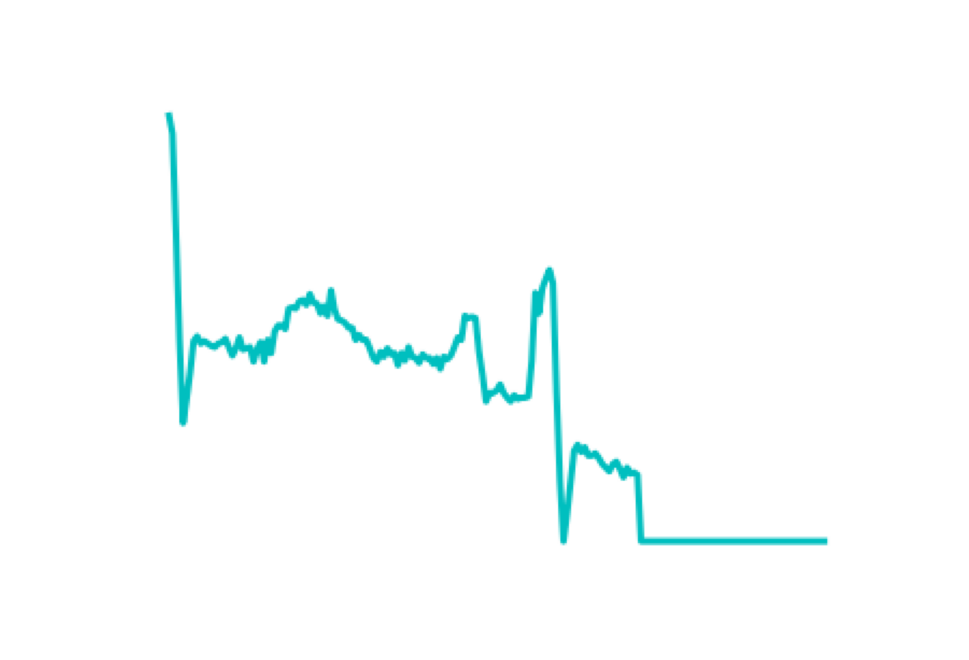

In [17]:
image = mpimg.imread(os.path.join('ECG_data/test/N/', N_imgs[0]))

imshow(image)

In [18]:
print(image.shape)
print(type(image))

(288, 432, 4)
<class 'numpy.ndarray'>


Show Images From Each Folder

In [19]:
# Define a function which will plot several images

def image_shows(folder, number_of_images):
    
    n=number_of_images;
    
    folder_list = os.listdir(folder)
    
    fig, axes = plt.subplots(nrows = 1, ncols=n, figsize=(20, 10))
    
    for i in range(n):
        
        print(os.path.join(folder, folder_list[i]))
        
        image = mpimg.imread(os.path.join(folder, folder_list[i]));
        
        axes[i].imshow(image);

ECG_data/test/N/N10007.png
ECG_data/test/N/N10010.png
ECG_data/test/N/N10014.png
ECG_data/test/N/N10019.png
ECG_data/test/N/N10025.png
ECG_data/test/N/N10034.png


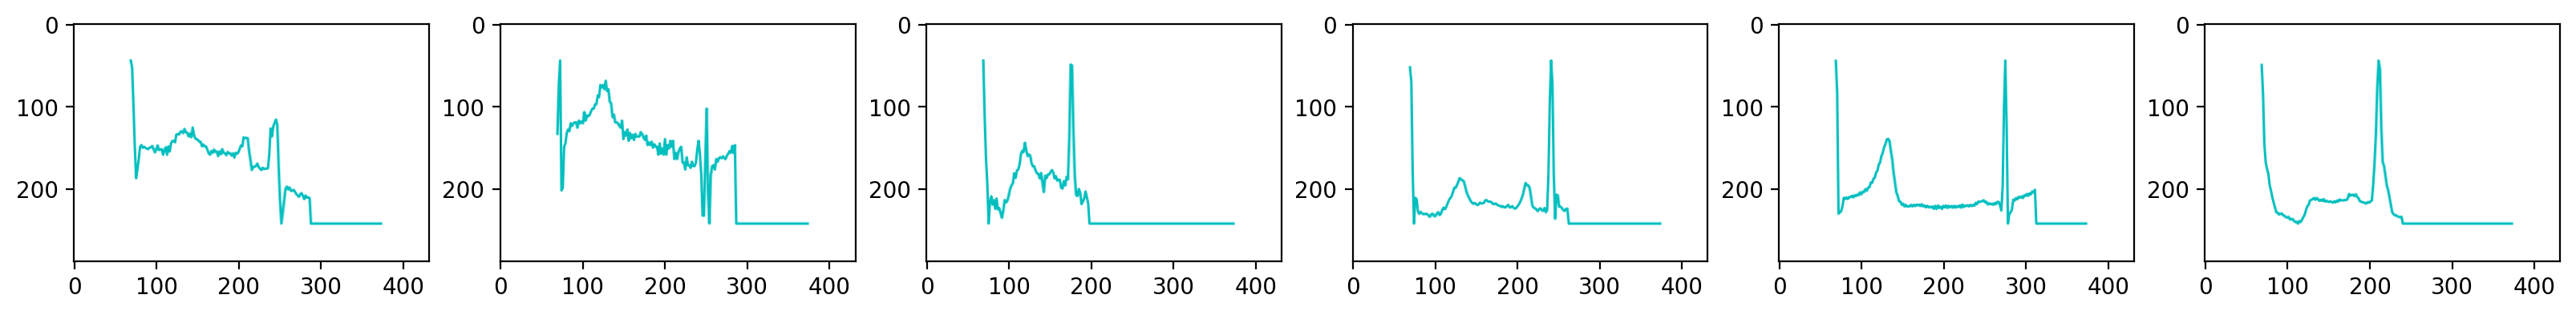

In [20]:
# Examples of N

image_shows(folder = 'ECG_data/test/N/', number_of_images = 6)

ECG_data/test/S/S100.png
ECG_data/test/S/S1008.png
ECG_data/test/S/S1010.png
ECG_data/test/S/S1018.png
ECG_data/test/S/S1021.png
ECG_data/test/S/S1030.png


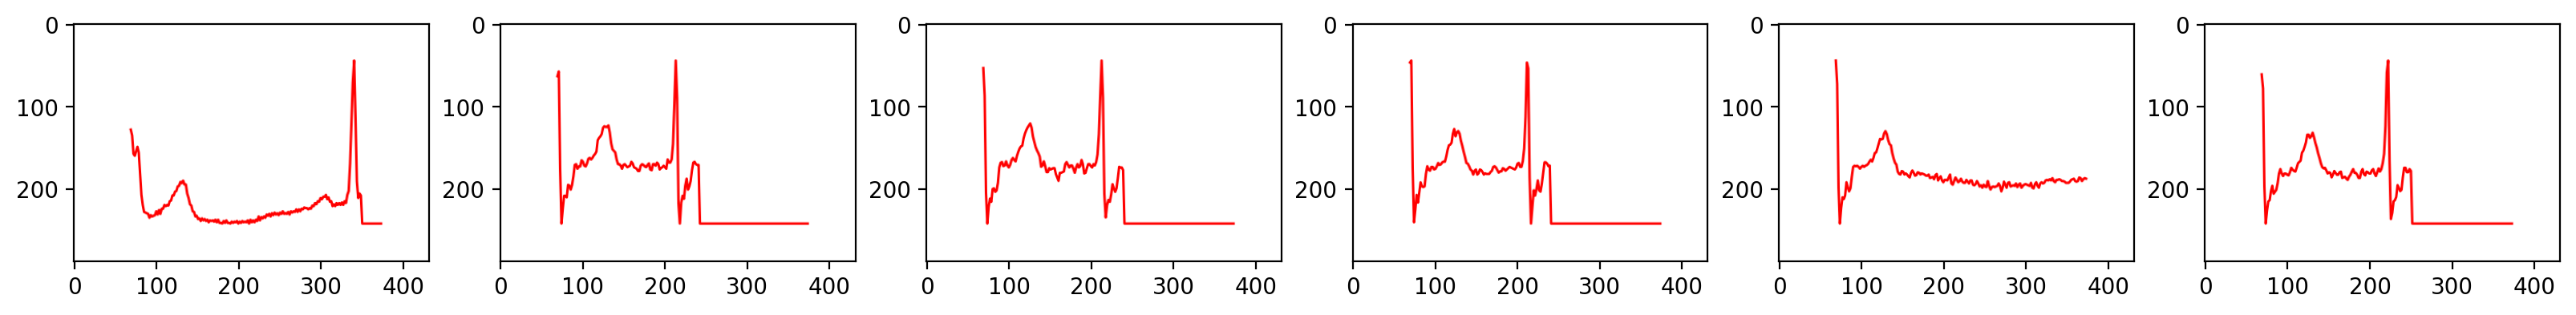

In [21]:
# Examples of S

image_shows(folder = 'ECG_data/test/S/', number_of_images = 6)

ECG_data/test/Q/Q1.png
ECG_data/test/Q/Q1002.png
ECG_data/test/Q/Q1003.png
ECG_data/test/Q/Q1009.png
ECG_data/test/Q/Q1011.png
ECG_data/test/Q/Q1021.png


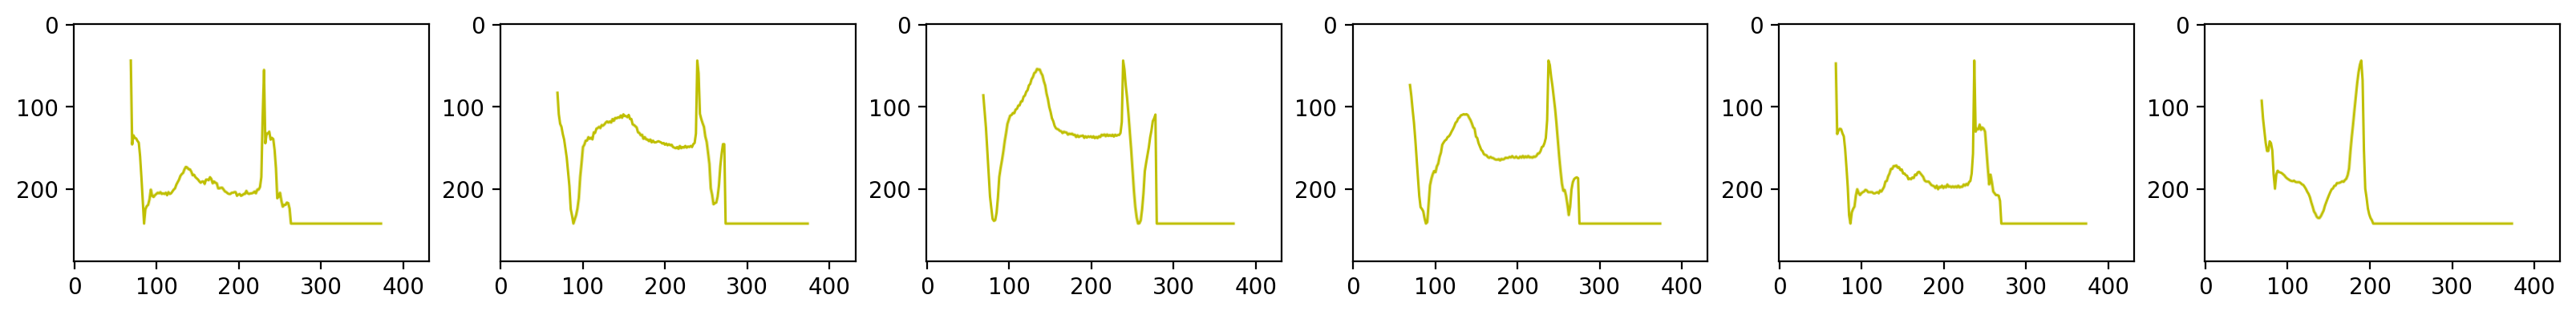

In [22]:
# Examples of Q

image_shows(folder = 'ECG_data/test/Q/', number_of_images = 6)

ECG_data/test/M/M0.png
ECG_data/test/M/M1.png
ECG_data/test/M/M10.png
ECG_data/test/M/M100.png
ECG_data/test/M/M1000.png
ECG_data/test/M/M1001.png


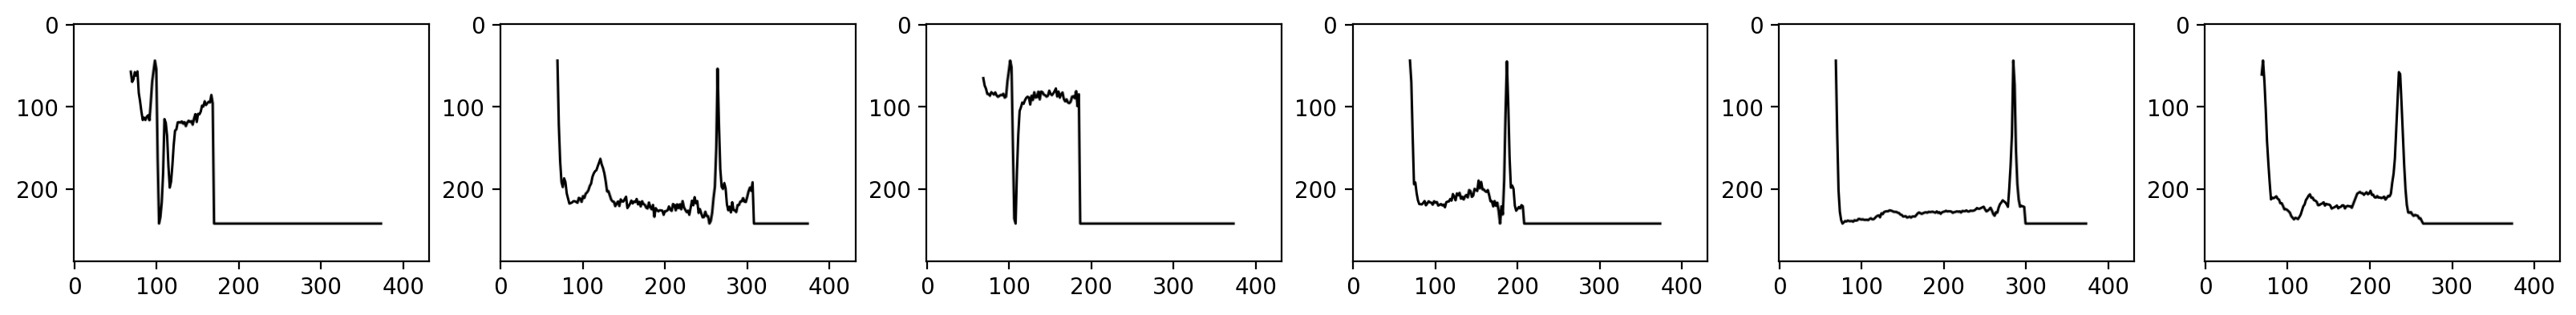

In [23]:
# Examples of M

image_shows(folder = 'ECG_data/test/M/', number_of_images = 6)

ECG_data/test/V/V1001.png
ECG_data/test/V/V1006.png
ECG_data/test/V/V1012.png
ECG_data/test/V/V102.png
ECG_data/test/V/V1023.png
ECG_data/test/V/V1030.png


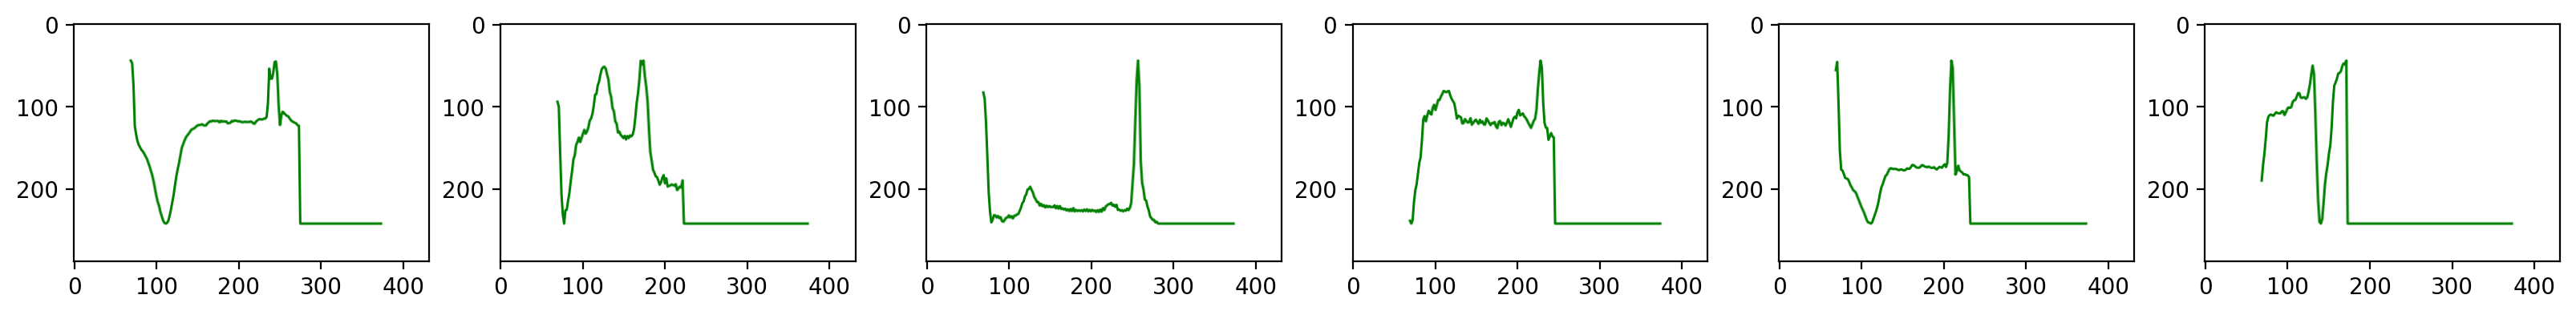

In [24]:
# Examples of V

image_shows(folder = 'ECG_data/test/V/', number_of_images = 6)

ECG_data/test/F/F0.png
ECG_data/test/F/F104.png
ECG_data/test/F/F113.png
ECG_data/test/F/F115.png
ECG_data/test/F/F118.png
ECG_data/test/F/F12.png


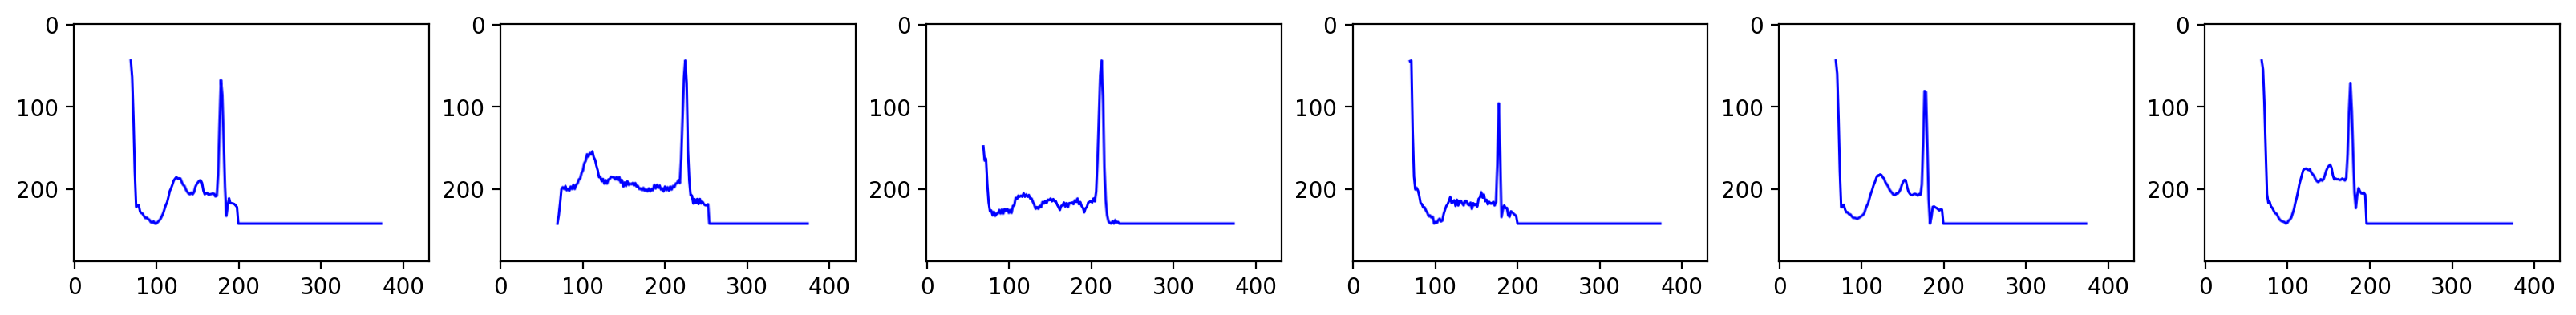

In [25]:
# Examples of F

image_shows(folder = 'ECG_data/test/F/', number_of_images = 6)

To see 3 channels I plot figures with cv 2 package

In [26]:
#import cv2
import cv2
import numpy as np

print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)


OpenCV version: 4.8.0
NumPy version: 1.21.5


In [25]:
import cv2

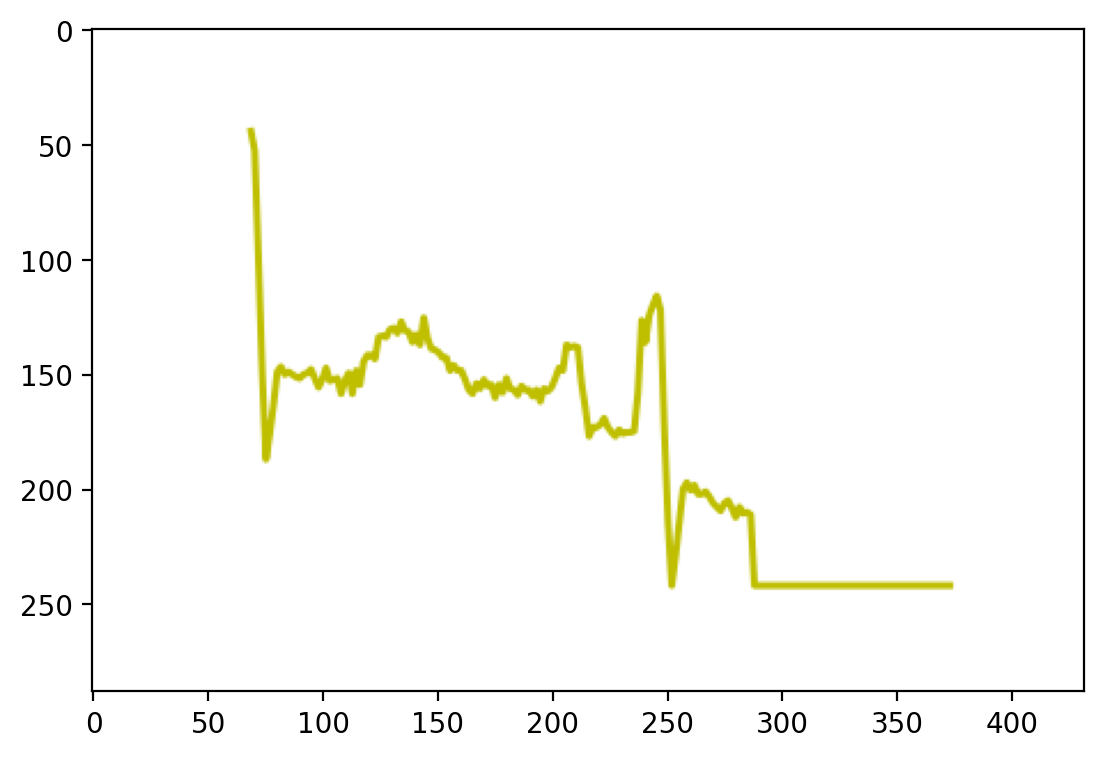

In [27]:
imgcv = cv2.imread(os.path.join('ECG_data/test/N/', N_imgs[0]))
plt.imshow(imgcv)
plt.show();

In [28]:
imgcv.shape

(288, 432, 3)

In [29]:
b = imgcv.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = imgcv.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = imgcv.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

plot rgb

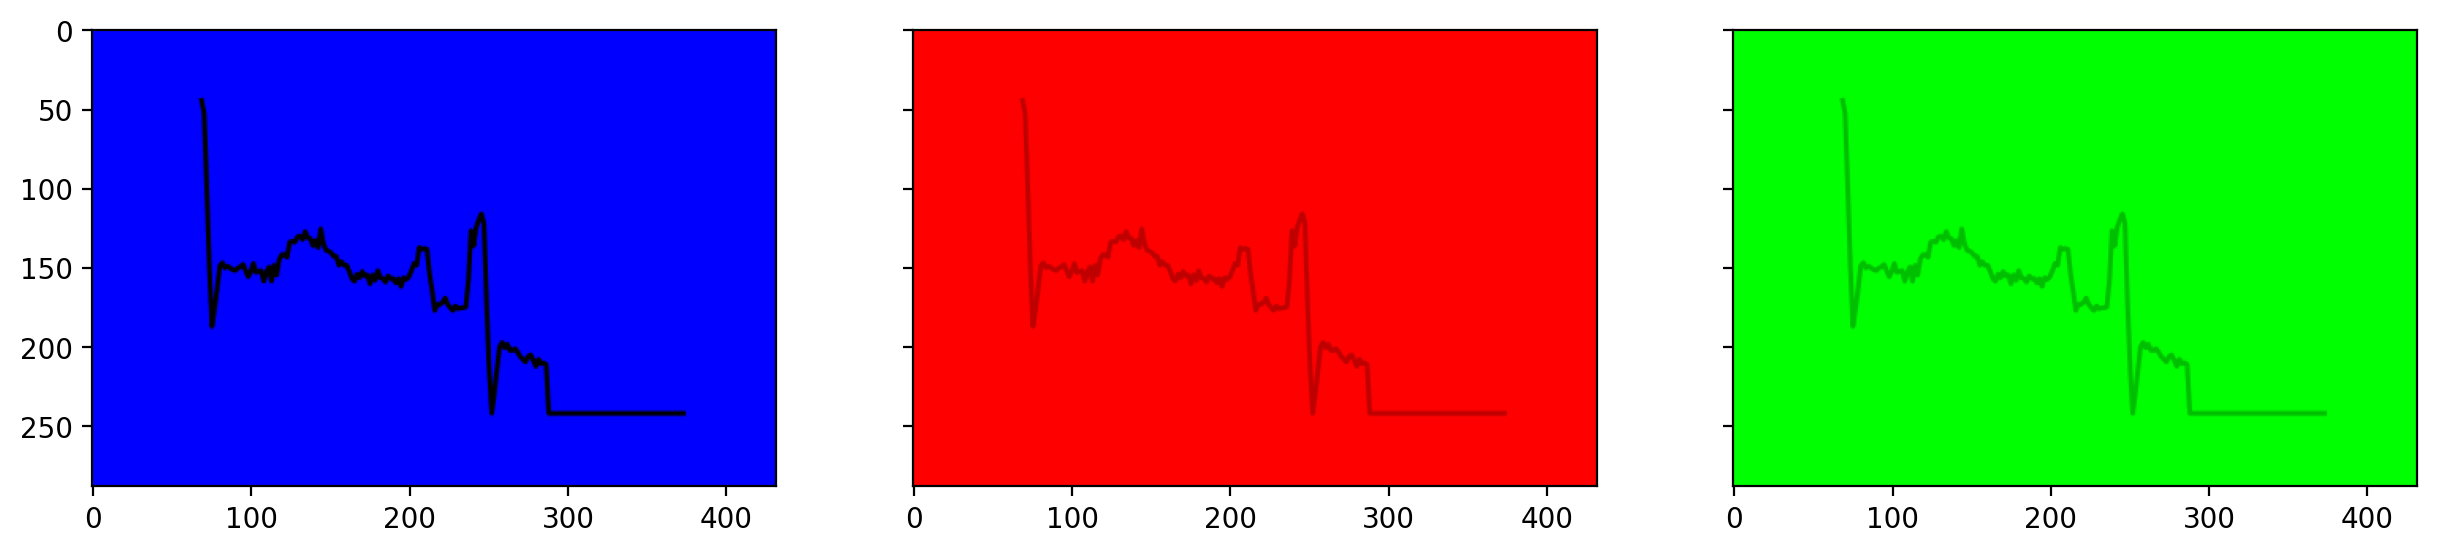

In [30]:
# plot data

fig = plt.figure(figsize=(15,15))

plot_1 = plt.subplot(131)
plot_1.imshow(r);

#plt.subplot(131).imshow(b);

plot_2 = plt.subplot(132, sharex=plot_1, sharey=plot_1)
plt.setp(plot_2.get_yticklabels(), visible=False);
plot_2.imshow(b);

plot_3 = plt.subplot(133, sharex=plot_1, sharey=plot_1)
plt.setp(plot_3.get_yticklabels(), visible=False);
plot_3.imshow(g);

plt.show();

In [31]:
for root, dirs, files in os.walk('ECG_data/'):
    print(root)
    #So, as the code runs, it will print the paths of all directories
    #within the '/ecg/' directory and its subdirectories.

ECG_data/
ECG_data/test
ECG_data/test\F
ECG_data/test\M
ECG_data/test\N
ECG_data/test\Q
ECG_data/test\S
ECG_data/test\V
ECG_data/train
ECG_data/train\F
ECG_data/train\M
ECG_data/train\N
ECG_data/train\Q
ECG_data/train\S
ECG_data/train\V


In [32]:
folder = 'ECG_data/'
list_files(folder)

 - 2
test - 6
    F - 161
    M - 2101
    N - 18926
    Q - 1608
    S - 556
    V - 1447
train - 6
    F - 642
    M - 8405
    N - 75709
    Q - 6431
    S - 2223
    V - 5789


In [33]:
N_imgs       = len(os.listdir('ECG_data/train/N/'))
N_train_imgs = len(os.listdir('ECG_data/train/N/'))
N_test_imgs  = len(os.listdir('ECG_data/test/N/'))
print('number of N images at the original file: ', N_imgs)
print('total number of train and test picts:    ', N_train_imgs + N_test_imgs)

number of N images at the original file:  75709
total number of train and test picts:     94635


In [34]:
S_imgs       = len(os.listdir('ECG_data/train/S/'))
S_train_imgs = len(os.listdir('ECG_data/train/S/'))
S_test_imgs  = len(os.listdir('ECG_data/test/S/'))
print('number of S images at the original file: ', S_imgs)
print('total number of train and test picts:    ', S_train_imgs + S_test_imgs)

number of S images at the original file:  2223
total number of train and test picts:     2779


In [35]:
F_imgs       = len(os.listdir('ECG_data/train/F/'))
F_train_imgs = len(os.listdir('ECG_data/train/F/'))
F_test_imgs  = len(os.listdir('ECG_data/test/F/'))
print('number of F images at the original file: ', F_imgs)
print('total number of train and test picts:    ', F_train_imgs + F_test_imgs)

number of F images at the original file:  642
total number of train and test picts:     803


In [36]:
V_imgs       = len(os.listdir('ECG_data/train/V/'))
V_train_imgs = len(os.listdir('ECG_data/train/V/'))
V_test_imgs  = len(os.listdir('ECG_data/test/V/'))
print('number of V images at the original file: ', V_imgs)
print('total number of train and test picts:    ', V_train_imgs + V_test_imgs)

number of V images at the original file:  5789
total number of train and test picts:     7236


In [38]:
M_imgs       = len(os.listdir('ECG_data/train/M/'))
M_train_imgs = len(os.listdir('ECG_data/train/M/'))
M_test_imgs  = len(os.listdir('ECG_data/test/M/'))
print('number of M images at the original file: ', M_imgs)
print('total number of train and test picts:    ', M_train_imgs + M_test_imgs)

number of M images at the original file:  8405
total number of train and test picts:     10506


In [39]:
Q_imgs       = len(os.listdir('ECG_data/train/Q/'))
Q_train_imgs = len(os.listdir('ECG_data/train/Q/'))
Q_test_imgs  = len(os.listdir('ECG_data/test/Q/'))
print('number of Q images at the original file: ', Q_imgs)
print('total number of train and test picts:    ', Q_train_imgs + Q_test_imgs)

number of Q images at the original file:  6431
total number of train and test picts:     8039


Lets load images with datasets.ImageFolder function and than read and plot

Set Data Loader

In [40]:
TRAIN_PATH        = 'ECG_data/train/'

transform         = transforms.Compose(
                                       [transforms.Resize([120,120]),
                                        transforms.Grayscale(), 
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5), (0.5))
                                       ])
  
train_data_set    = datasets.ImageFolder(root=TRAIN_PATH, transform=transform)

batch_size=32

train_data_loader = DataLoader(train_data_set, batch_size=batch_size, shuffle=True)

In [41]:
TEST_PATH        = 'ECG_data/test/'
  
test_data_set    = datasets.ImageFolder(root=TEST_PATH, transform=transform)

test_data_loader = DataLoader(test_data_set, batch_size=batch_size, shuffle=True)

In [42]:
# Run this to test your data loader

images, labels = next(iter(train_data_loader))

In [43]:
print(type(images))

print(images.size())

print("")
print("Batch Size:   ",images.size()[0])
print("Channel Size: ",images.size()[1])
print("Image Height: ",images.size()[2])
print("Image Width:  ",images.size()[3])

<class 'torch.Tensor'>
torch.Size([32, 1, 120, 120])

Batch Size:    32
Channel Size:  1
Image Height:  120
Image Width:   120


The batch size is 32, image size is reduced to 120*120 and we need only one channel(Gray Scale).

In [44]:
def imshow_tensor(image, ax=None, title=None, normalize=True):
    
    """Imshow for Tensor."""
    
    if ax is None:
        fig, ax = plt.subplots()
        
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5])
        std = np.array([0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

Plot one Batch of Files from Dataloader

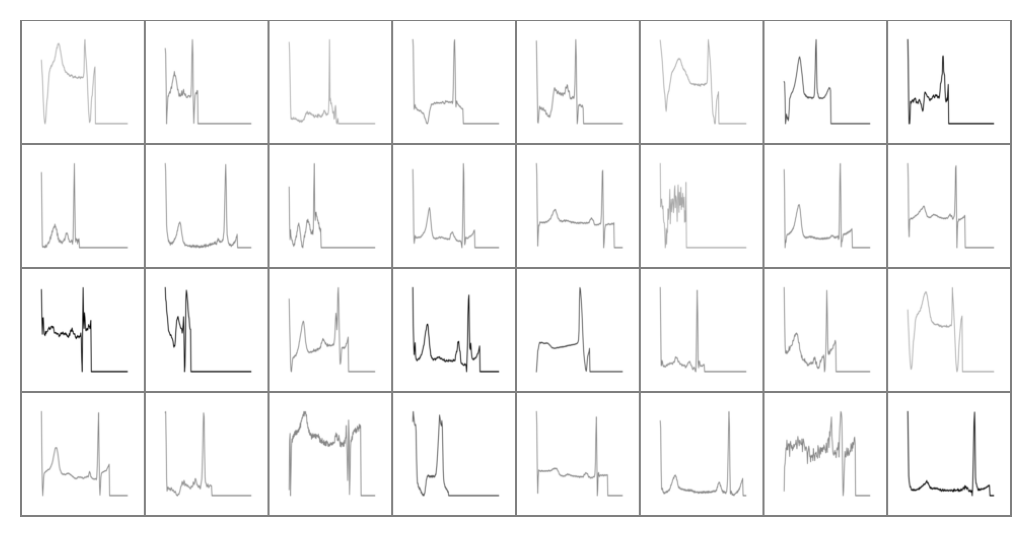

In [45]:
# show images

ncol = 8;

imshow_tensor(torchvision.utils.make_grid(images,nrow = ncol));

In [46]:
# print labels

classes = ('N', 'Q', 'F', 'S', 'V','M')

nrow = batch_size/ncol;

for row in range(int(nrow)):
    
    print(' '.join('%5s' % classes[labels[(row*ncol)+j]] for j in range(ncol)))

    S     F     S     F     F     S     M     Q
    F     F     F     F     F     S     F     F
    Q     Q     F     Q     M     F     F     S
    F     F     F     M     F     F     F     Q


Building Convolutional Neural Networks

First CNN Model

In [47]:
# CNN Architect

class ConvNet_1(nn.Module):
    
    def __init__(self):
        
        super(ConvNet_1, self).__init__()

        self.layer_1  = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)
        
        self.relu1    = nn.ReLU(inplace=True)
        
        self.maxpool1 = MaxPool2d(kernel_size=2)
        

        self.layer_2  = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, stride=1, padding=1)
        
        self.relu2    = nn.ReLU(inplace=True)
        
        self.maxpool2 = MaxPool2d(kernel_size=2)
        
        self.drop_out = nn.Dropout()
        
        
        # out_channels = 4, number of classes = 6
        
        # image width = 120, image height = 120 after two maxpooling 120 -> 60 -> 30
        
        self.fc1 = nn.Linear(4 * 30 * 30, 6)
        
    # Defining the forward pass
    def forward(self, x):
        
        out = self.layer_1(x)
        
        out = self.relu1(out)
        
        out = self.maxpool1(out)
        
        
        out = self.layer_2(out)
        
        out = self.relu2(out)
        
        out = self.maxpool2(out)
        
        
        out = out.reshape(out.size(0), -1)
        
        out = self.drop_out(out)
        
        out = self.fc1(out)
        
        return out
    
# Define Model

model_1 = ConvNet_1()

print(model_1)

ConvNet_1(
  (layer_1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU(inplace=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer_2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU(inplace=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3600, out_features=6, bias=True)
)


In [48]:
# Define Criterion

criterion = nn.CrossEntropyLoss()

# Define Optimizer

optimizer = optim.SGD(model_1.parameters(), lr=0.001, momentum=0.9)

In [49]:
# Whether to train on a gpu and Number of gpus

if cuda.is_available(): 
    
    print(f'{cuda.device_count()} number of gpus are detected and available.')
    
else:
        
    print(f'Train on gpu is not available')
        

Train on gpu is not available


Train Our First Model

Devise is cpu and model is started training.
Epoch [1/1], Step [300/3100], Loss: 0.7877, Accuracy: 78.12%
Epoch [1/1], Step [600/3100], Loss: 0.7287, Accuracy: 78.12%
Epoch [1/1], Step [900/3100], Loss: 0.3494, Accuracy: 87.50%
Epoch [1/1], Step [1200/3100], Loss: 0.1941, Accuracy: 90.62%
Epoch [1/1], Step [1500/3100], Loss: 0.0805, Accuracy: 96.88%
Epoch [1/1], Step [1800/3100], Loss: 0.0571, Accuracy: 96.88%
Epoch [1/1], Step [2100/3100], Loss: 0.2603, Accuracy: 93.75%
Epoch [1/1], Step [2400/3100], Loss: 0.0732, Accuracy: 96.88%
Epoch [1/1], Step [2700/3100], Loss: 0.1565, Accuracy: 96.88%
Epoch [1/1], Step [3000/3100], Loss: 0.0468, Accuracy: 100.00%
tensor([[ 6996,     4,     0,    82,    24,   132],
        [ 1301, 75533,  2643,   694,  1826,   123],
        [    1,    86,  3787,     0,     2,     0],
        [   17,    24,     1,  1198,   113,     7],
        [   63,    60,     0,   238,  3773,    63],
        [   27,     2,     0,    11,    51,   317]], dtype=torch.int32)
Finis

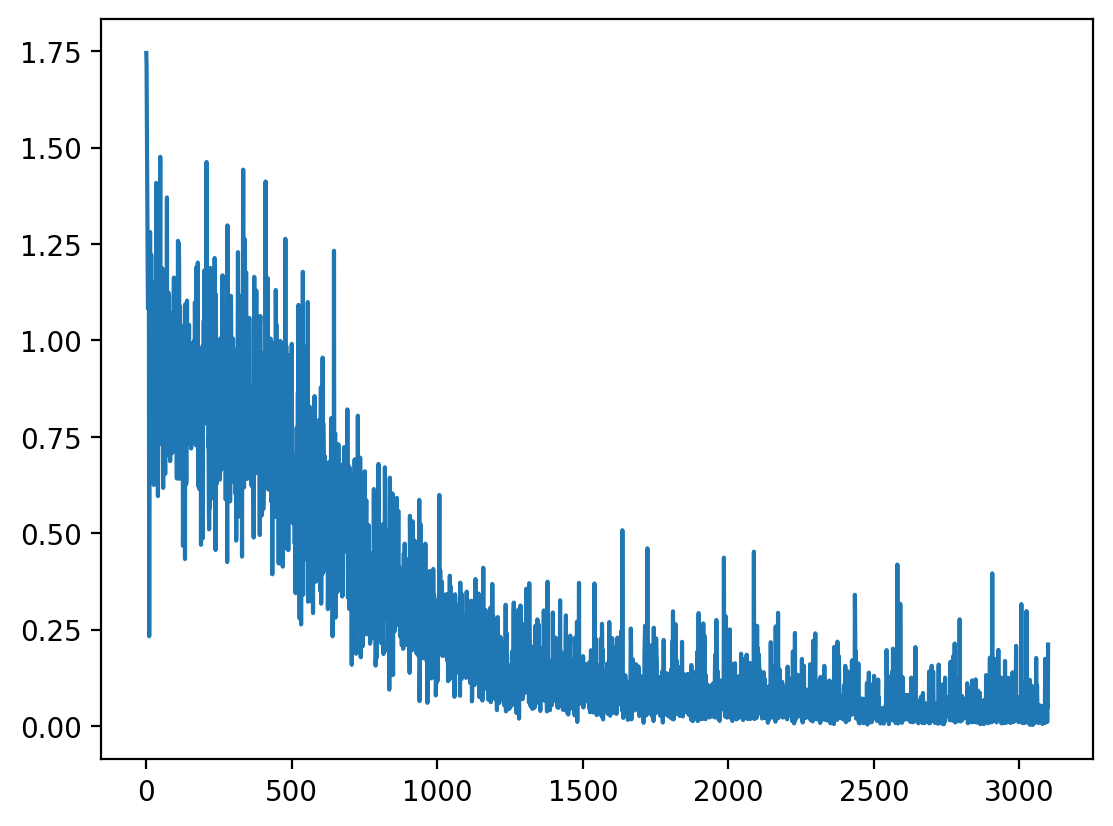

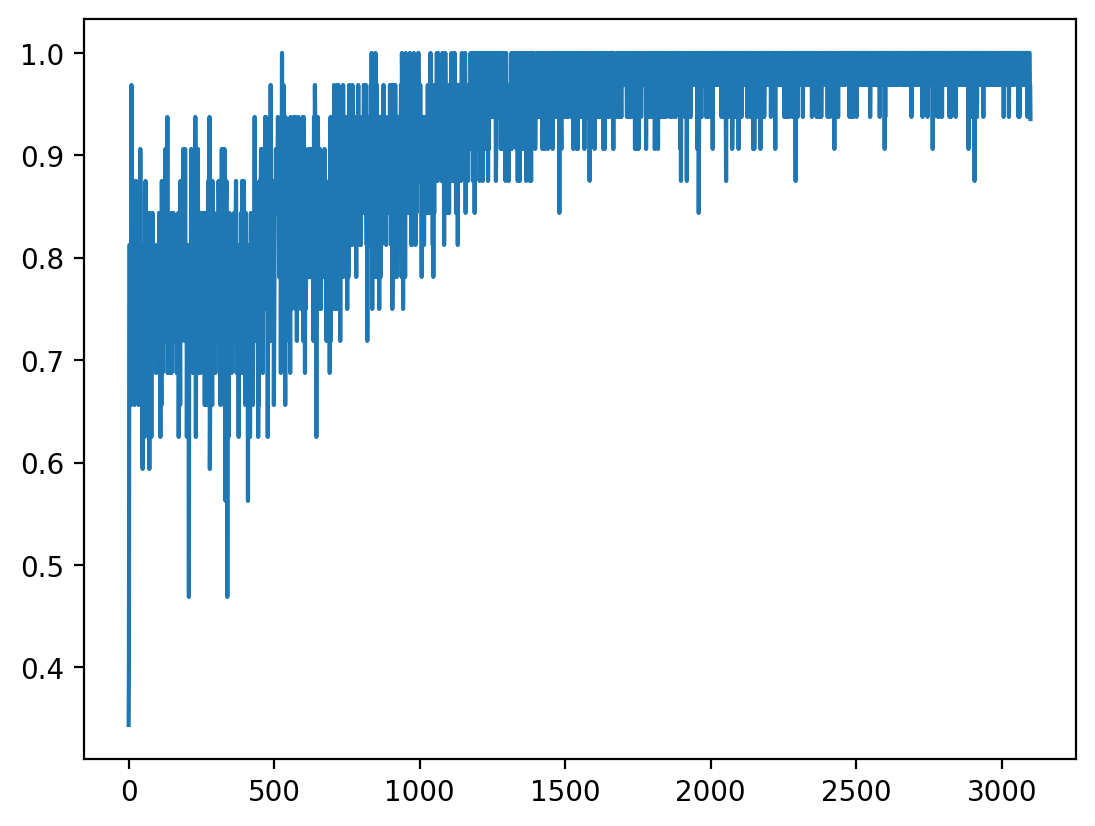

In [50]:
# This part is working

# Train the model

if torch.cuda.is_available():
    
    MODEL = model_1.cuda()
    CRITERION = criterion.cuda()
    print(f'Model is started training on {cuda.device_count()} number of gpus.')
    print("Devise is cuda")
    
else:
    
    MODEL = model_1
    CRITERION = criterion
    print("Devise is cpu and model is started training.")

total_step = len(train_data_loader)
loss_list = []
acc_list = []

num_epochs = 1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

all_con_mat = torch.zeros([num_epochs, 6, 6], dtype=torch.int32, device=device)

for epoch in range(num_epochs):
     # define empty tensor 5*5 beginning of every epoch
    # tensor [row,column]
    con_mat = torch.zeros([6, 6], dtype=torch.int32, device=device)
    
    for i, data in enumerate(train_data_loader):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # optimization
        optimizer.zero_grad()
        
        # Forward to get output
        outputs = MODEL(inputs)
        # Calculate Loss
        loss = CRITERION(outputs, labels)
        # Backward propagation
        loss.backward()
        # Updating parameters
        optimizer.step()
        
        # Store loss
        loss_list.append(loss.item())
    
        # Calculate labels size
        total = labels.size(0)
        
        # Outputs.data has dimension batch size * 5
        # torch.max returns the max value of elements(_) and their indices(predicted) in the tensor array
        _, predicted = torch.max(outputs.data, 1)
         # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        # Store accuracy
        acc_list.append(correct / total)
        
        
        # Build Confusion Matrix
        for element in range(total):
            
            # con_mat[row,column]
            # con_mat[predictions, actual]
            
            con_mat[predicted[element].item()-1][labels[element].item()-1] += 1

        if (i + 1) % 300 == 0:                             # every 300 mini-batches...
            
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
    print(con_mat)
            
    all_con_mat[epoch] = con_mat            
            
print('Finished Training')

plt.plot(loss_list);
plt.show();

plt.plot(acc_list);
plt.show();

In [53]:
# SUM FOR EACH COLUMN

# M N Q S V F

print(torch.sum(con_mat, dim=0))

tensor([ 8405, 75709,  6431,  2223,  5789,   642])


In [54]:
folder = 'ECG_data/'
list_files(folder)

 - 2
test - 6
    F - 161
    M - 2101
    N - 18926
    Q - 1608
    S - 556
    V - 1447
train - 6
    F - 642
    M - 8405
    N - 75709
    Q - 6431
    S - 2223
    V - 5789


In [56]:
# RECALL

# PRECISION

# F1-score = 2 × (precision × recall)/(precision + recall)

class_list = ['M','N', 'Q', 'S', 'V', 'F']

f1_score_list=[0,0,0,0,0,0]

precision_list=[0,0,0,0,0,0]

recall_list=[0,0,0,0,0,0]

delta = 0.0000000000001

for i in range(torch.sum(con_mat, dim=0).size(0)): 
    
    recall_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=0)[i].item()+delta)
    
    precision_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=1)[i].item()+delta)
    
    f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
    
    print('class: {:<2},total number of class: {:>6}, Correctly predicted: {:>6}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(con_mat, dim=0)[i].item(),
                          con_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))

class: M ,total number of class:   8405, Correctly predicted:   6996, Recall: 0.83%, Precision: 0.97%, F1-Score: 0.89%
class: N ,total number of class:  75709, Correctly predicted:  75533, Recall: 1.00%, Precision: 0.92%, F1-Score: 0.96%
class: Q ,total number of class:   6431, Correctly predicted:   3787, Recall: 0.59%, Precision: 0.98%, F1-Score: 0.73%
class: S ,total number of class:   2223, Correctly predicted:   1198, Recall: 0.54%, Precision: 0.88%, F1-Score: 0.67%
class: V ,total number of class:   5789, Correctly predicted:   3773, Recall: 0.65%, Precision: 0.90%, F1-Score: 0.76%
class: F ,total number of class:    642, Correctly predicted:    317, Recall: 0.49%, Precision: 0.78%, F1-Score: 0.60%


cpu
Epoch [1/5], Step [300/3100], Loss: 0.0119, Accuracy: 100.00%
Epoch [1/5], Step [600/3100], Loss: 0.0169, Accuracy: 100.00%
Epoch [1/5], Step [900/3100], Loss: 0.0195, Accuracy: 100.00%
Epoch [1/5], Step [1200/3100], Loss: 0.0135, Accuracy: 100.00%
Epoch [1/5], Step [1500/3100], Loss: 0.0204, Accuracy: 100.00%
Epoch [1/5], Step [1800/3100], Loss: 0.0253, Accuracy: 100.00%
Epoch [1/5], Step [2100/3100], Loss: 0.0717, Accuracy: 96.88%
Epoch [1/5], Step [2400/3100], Loss: 0.0699, Accuracy: 96.88%
Epoch [1/5], Step [2700/3100], Loss: 0.0031, Accuracy: 100.00%
Epoch [1/5], Step [3000/3100], Loss: 0.0164, Accuracy: 100.00%
tensor([[ 8346,     0,     0,    15,     9,    62],
        [    0, 75654,    60,    30,    49,     0],
        [    0,    35,  6371,     0,     0,     0],
        [    4,     2,     0,  1916,   179,    21],
        [   25,    18,     0,   247,  5512,    44],
        [   30,     0,     0,    15,    40,   515]], dtype=torch.int32)
class name: M, total number of class:  

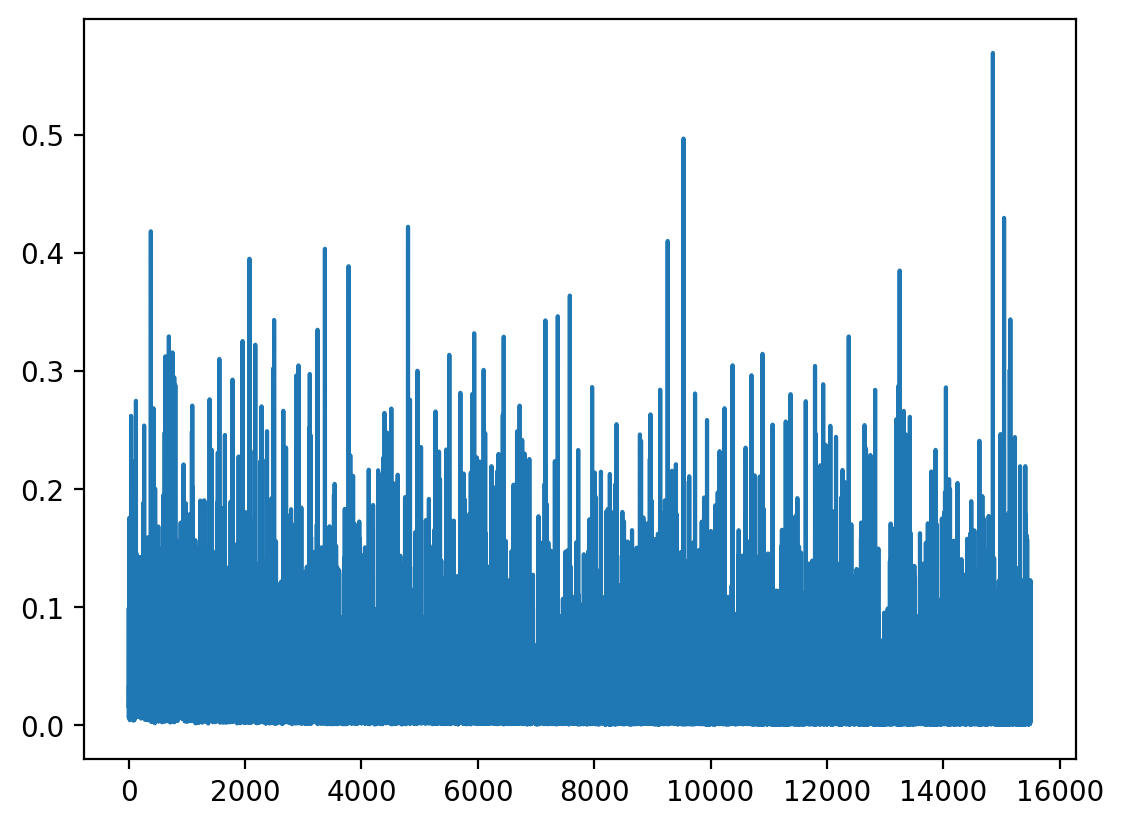

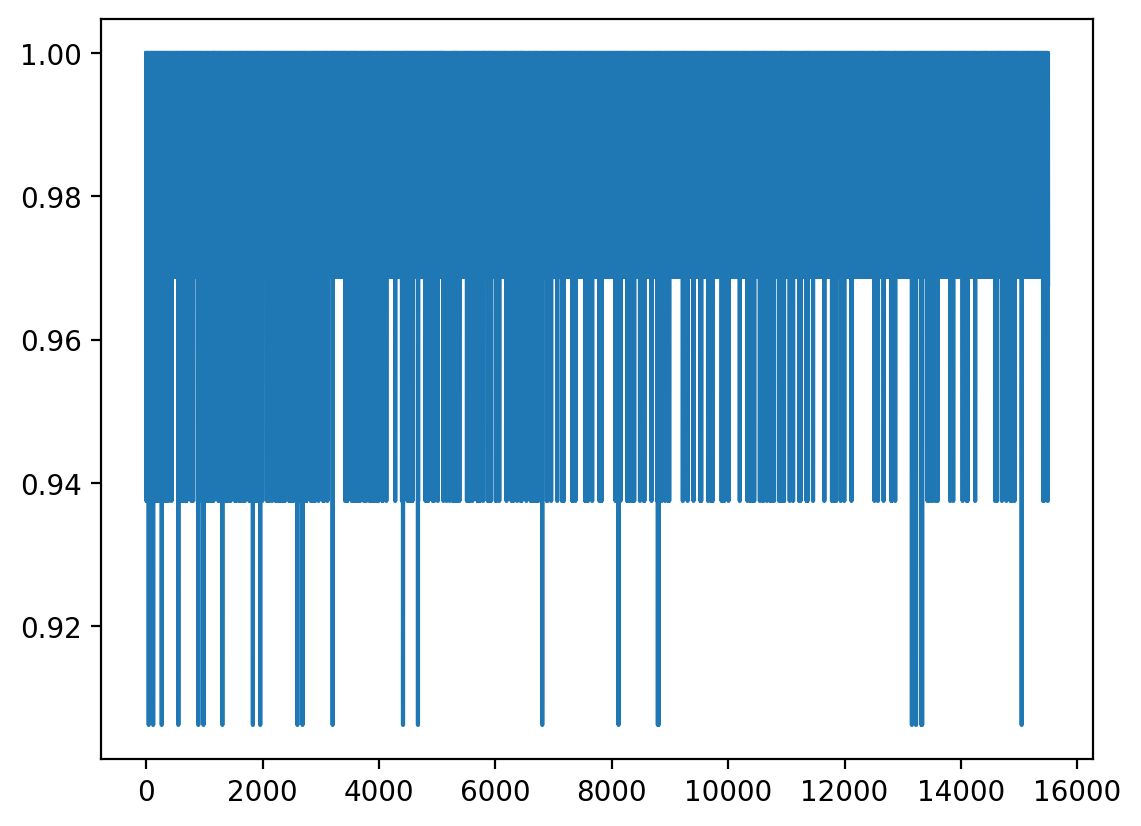

In [57]:
# This part is working

if torch.cuda.is_available():
    
    MODEL = model_1.cuda()
    CRITERION = criterion.cuda()
    print("cuda")
    
else:
    
    MODEL = model_1
    CRITERION = criterion
    print("cpu")

# Train the model

total_step = len(train_data_loader)
loss_list = []
acc_list = []

num_epochs = 5

class_list = ['M','N', 'Q', 'S', 'V', 'F']

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

all_con_mat = torch.zeros([num_epochs, 6, 6], dtype=torch.int32, device=device)

for epoch in range(num_epochs):
    f1_score_list=[0,0,0,0,0,0]

    precision_list=[0,0,0,0,0,0]

    recall_list=[0,0,0,0,0,0]
    
    delta = 0.0000000000001 
    
    # define empty tensor 5*5 beginning of every epoch
    # tensor [row,column]
    con_mat = torch.zeros([6, 6], dtype=torch.int32, device=device)
    
    for i, data in enumerate(train_data_loader):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # optimization
        optimizer.zero_grad()
        
        # Forward to get output
        outputs = MODEL(inputs)
        # Calculate Loss
        loss = CRITERION(outputs, labels)
        # Backward propagation
        loss.backward()
        # Updating parameters
        optimizer.step()
        
        # Store loss
        loss_list.append(loss.item())
    
        # Calculate labels size
        total = labels.size(0)
        
        # Outputs.data has dimension batch size * 5
        # torch.max returns the max value of elements(_) and their indices(predicted) in the tensor array
        _, predicted = torch.max(outputs.data, 1)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        # Store accuracy
        acc_list.append(correct / total)
        
        for element in range(total):
            
            # con_mat[row,column]
            # con_mat[predictions, actual]
            con_mat[predicted[element].item()-1][labels[element].item()-1] += 1

        if (i + 1) % 300 == 0:                             # every 300 mini-batches...
            
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
    print(con_mat)
            
    all_con_mat[epoch] = con_mat
    
    # Print Confusion Matrix
    
    for i in range(torch.sum(con_mat, dim=0).size(0)): 
    
        recall_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=0)[i].item()+delta)
    
        precision_list[i] = con_mat[i][i].item()/(torch.sum(con_mat, dim=1)[i].item()+delta)
    
        f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
        
    
        print('class name: {}, total number of class: {:>6}, Correctly predicted: {:>6}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(con_mat, dim=0)[i].item(),
                          con_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))
        
print('Finished Training')

plt.plot(loss_list);
plt.show();

plt.plot(acc_list);
plt.show();
        
        
    

In [58]:
all_con_mat

tensor([[[ 8346,     0,     0,    15,     9,    62],
         [    0, 75654,    60,    30,    49,     0],
         [    0,    35,  6371,     0,     0,     0],
         [    4,     2,     0,  1916,   179,    21],
         [   25,    18,     0,   247,  5512,    44],
         [   30,     0,     0,    15,    40,   515]],

        [[ 8347,     0,     0,     8,    11,    59],
         [    0, 75677,    40,    12,    25,     0],
         [    0,    24,  6391,     0,     0,     0],
         [    6,     1,     0,  1955,   190,     7],
         [    9,     7,     0,   238,  5544,    39],
         [   43,     0,     0,    10,    19,   537]],

        [[ 8358,     0,     0,     8,     3,    53],
         [    0, 75687,    28,    10,    16,     0],
         [    0,    15,  6403,     0,     0,     0],
         [    3,     2,     0,  1979,   175,    12],
         [    8,     5,     0,   217,  5587,    22],
         [   36,     0,     0,     9,     8,   555]],

        [[ 8356,     0,     0,     4,   

Check Trained 1. Model on the Test Data

In [59]:
confusion_mat = torch.zeros([6, 6], dtype=torch.int32, device=device)

with torch.no_grad():
    
    for data in test_data_loader:
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = MODEL(inputs)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total = labels.size(0)
        
        # Calculate total number of correct labels 
        correct = (predicted == labels).sum().item()
        
        for element in range(total):
            
            # confusion_mat[row,column]
            # confusion_mat[predictions, actual]
            confusion_mat[predicted[element].item()-1][labels[element].item()-1] += 1

    print(confusion_mat)

tensor([[ 2068,     0,     0,     1,     1,     9],
        [    0, 18924,     4,     1,     3,     0],
        [    0,     1,  1604,     0,     0,     0],
        [    4,     0,     0,   502,    35,     2],
        [    3,     1,     0,    50,  1403,     2],
        [   26,     0,     0,     2,     5,   148]], dtype=torch.int32)


In [60]:
class_list = ['M','N', 'Q', 'S', 'V', 'F']

f1_score_list=[0,0,0,0,0,0]

precision_list=[0,0,0,0,0,0]

recall_list=[0,0,0,0,0,0]
    
delta = 0.0000000000001 


for i in range(torch.sum(confusion_mat, dim=0).size(0)): 
    
        recall_list[i] = confusion_mat[i][i].item()/(torch.sum(confusion_mat, dim=0)[i].item()+delta)
    
        precision_list[i] = confusion_mat[i][i].item()/(torch.sum(confusion_mat, dim=1)[i].item()+delta)
    
        f1_score_list[i] = 2 * precision_list[i]*recall_list[i]/(precision_list[i]+recall_list[i]+delta)
        
        print('class name: {}, total number of class: {:>6}, Correctly predicted: {:>6}, Recall: {:.2f}%, Precision: {:.2f}%, F1-Score: {:.2f}%'
          
                  .format(class_list[i],
                          torch.sum(confusion_mat, dim=0)[i].item(),
                          confusion_mat[i][i].item(), 
                          recall_list[i],
                          precision_list[i],
                          f1_score_list[i]
                         ))

class name: M, total number of class:   2101, Correctly predicted:   2068, Recall: 0.98%, Precision: 0.99%, F1-Score: 0.99%
class name: N, total number of class:  18926, Correctly predicted:  18924, Recall: 1.00%, Precision: 1.00%, F1-Score: 1.00%
class name: Q, total number of class:   1608, Correctly predicted:   1604, Recall: 1.00%, Precision: 1.00%, F1-Score: 1.00%
class name: S, total number of class:    556, Correctly predicted:    502, Recall: 0.90%, Precision: 0.92%, F1-Score: 0.91%
class name: V, total number of class:   1447, Correctly predicted:   1403, Recall: 0.97%, Precision: 0.96%, F1-Score: 0.97%
class name: F, total number of class:    161, Correctly predicted:    148, Recall: 0.92%, Precision: 0.82%, F1-Score: 0.87%
